In [1]:
# Sheetal Sharma
# Brandon Boogaard
# Rohan Manvatkar
# Xiangrui Xie
# Yu Zhang

In [2]:
# In this notebook we read in the data which we wrote to the excel files in Part A. With the 
# compensation data, we compute a 'job rank' and chart that using the seaborn module. With the 
# job descriptions, we create a wordcloud (using the wordcloud module) to visualize the 
# keywords.

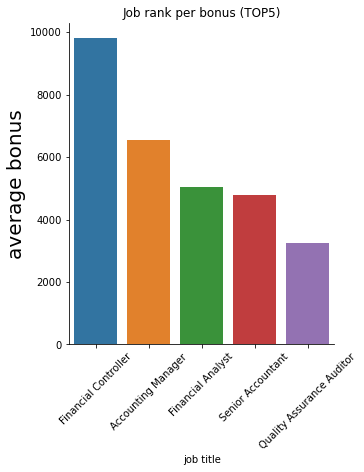

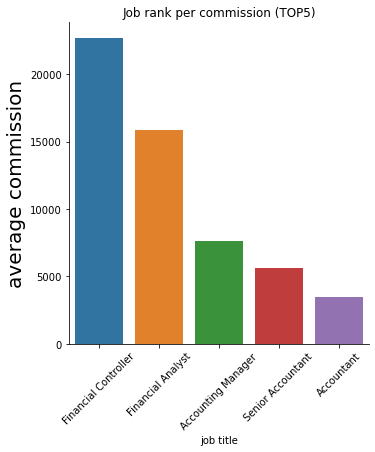

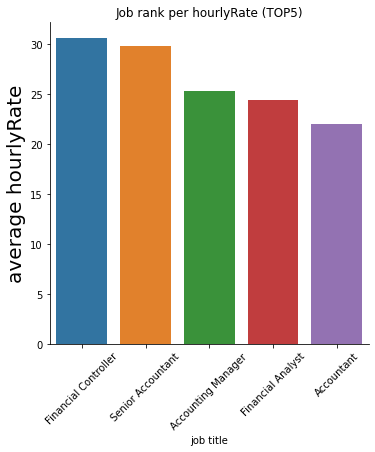

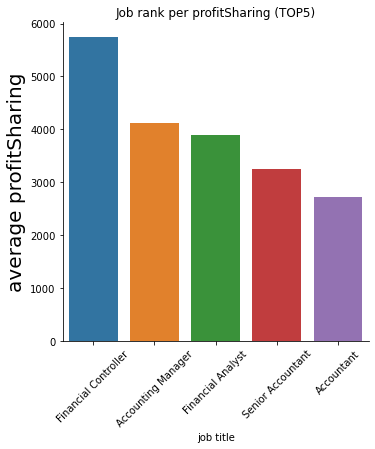

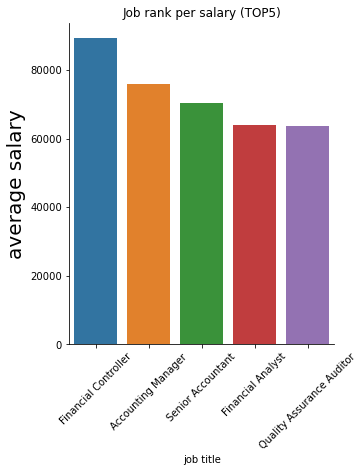

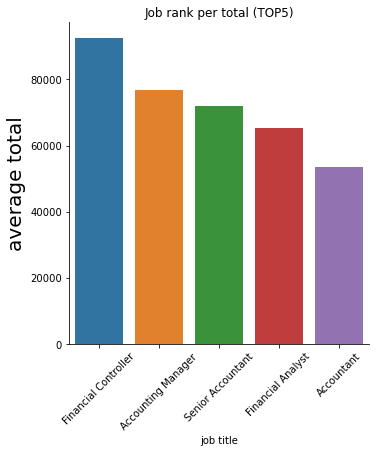

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import pandas as pd
from pandas import Series, DataFrame as df
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

data_file=pd.read_excel('payscale.xlsx')
bonus_data=df(data_file, columns=['Unnamed: 0','bonus_10','bonus_25','bonus_50','bonus_75','bonus_90'])
commission_data=df(data_file, columns=['Unnamed: 0','commission_10','commission_25','commission_50','commission_75','commission_90'])
hourlyRate_data=df(data_file, columns=['Unnamed: 0','hourlyRate_10','hourlyRate_25','hourlyRate_50','hourlyRate_75','hourlyRate_90'])
profitSharing_data=df(data_file, columns=['Unnamed: 0','profitSharing_10','profitSharing_25','profitSharing_50','profitSharing_75','profitSharing_90'])
salary_data=df(data_file, columns=['Unnamed: 0','salary_10','salary_25','salary_50','salary_75','salary_90'])
total_data=df(data_file, columns=['Unnamed: 0','total_10','total_25','total_50','total_75','total_90'])



bonus_data['average bonus']=bonus_data.sum(axis=1)/5
bonus_rank=bonus_data.sort_values('average bonus',ascending=False).head()


commission_data['average commission']=commission_data.sum(axis=1)/5
commission_rank=commission_data.sort_values('average commission',ascending=False).head()

hourlyRate_data['average hourlyRate']=hourlyRate_data.sum(axis=1)/5
hourlyRate_rank=hourlyRate_data.sort_values('average hourlyRate',ascending=False).head()

profitSharing_data['average profitSharing']=profitSharing_data.sum(axis=1)/5
profitSharing_rank=profitSharing_data.sort_values('average profitSharing',ascending=False).head()

salary_data['average salary']=salary_data.sum(axis=1)/5
salary_rank=salary_data.sort_values('average salary',ascending=False).head()

total_data['average total']=total_data.sum(axis=1)/5
total_rank=total_data.sort_values('average total',ascending=False).head()




datalist=[bonus_rank,commission_rank,hourlyRate_rank,profitSharing_rank,salary_rank,total_rank]
columnlist=['average bonus','average commission','average hourlyRate','average profitSharing','average salary','average total']


for i in range(6):
    seaborn.catplot(x='Unnamed: 0', y=columnlist[i],data= datalist[i],kind='bar',ci=None)
    plt.ylabel(columnlist[i],fontsize=20)
    plt.xlabel('job title',fontsize=10)
    plt.tick_params(axis='x', which='major',labelrotation= 45, labelsize=10)
    plt.title('Job rank per '+columnlist[i].split(' ')[1]+' (TOP5)')
    
 


In [4]:
desc_file=pd.read_excel('job_desc.xlsx')


In [5]:
desc_file

,Unnamed: 0,Job Title,Job Description
0,0,Staff Accountant,Staff accountants are responsible for a range ...
1,1,Accountant,Accountants perform financial calculations for...
2,2,Financial Analyst,Corporations and businesses typically have a r...
3,3,Senior Accountant,"Senior accountants are the lead ""numbers"" peop..."
4,4,Financial Controller,"The position of financial controller, or compt..."
5,5,Quality Assurance Auditor,The responsibility of the quality assurance au...
6,6,Accounting Manager,"In most businesses, an accounting manager deve..."


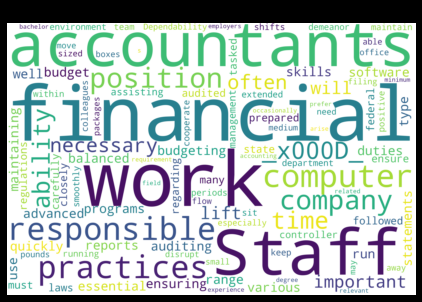

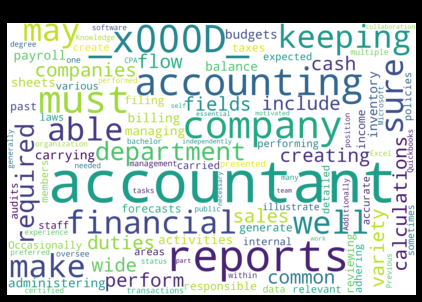

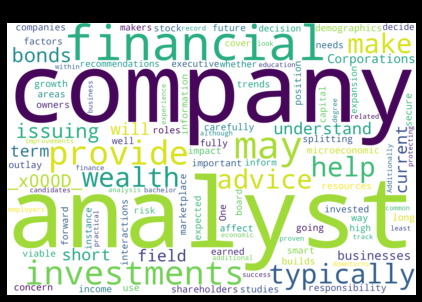

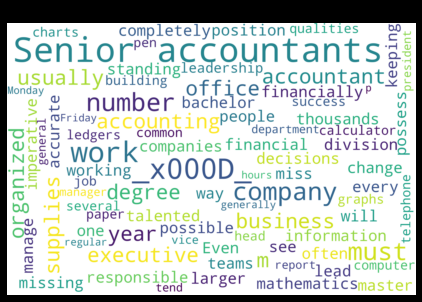

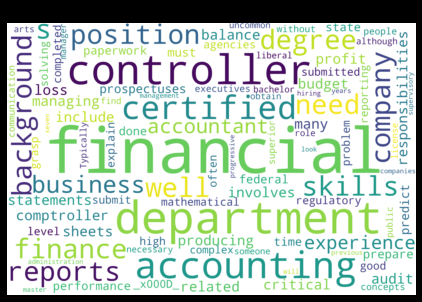

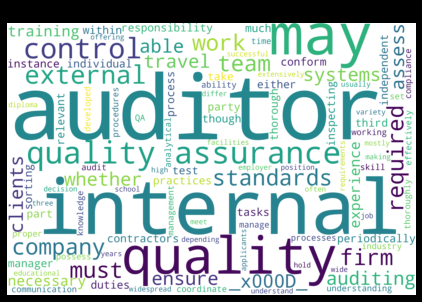

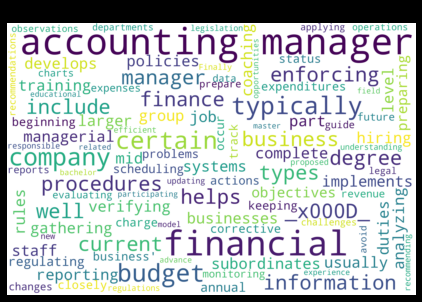

In [6]:
for index, row in desc_file.iterrows():
    cloud_title = row['Job Title']
    

    text = row['Job Description']
    wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(text)

    fig = plt.figure(
        figsize = (8, 4),
        facecolor = 'k',
        edgecolor = 'k')

    plt.imshow(wordcloud, interpolation = 'bilinear')

    plt.title(cloud_title)
    plt.axis('off')
    plt.tight_layout(pad=0)

    plt.show()